In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


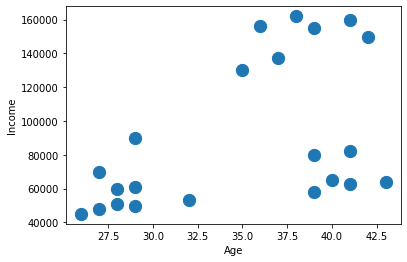

In [6]:
plt.scatter(data['Age'],data['Income($)'],s=150)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [7]:
x = data[['Age','Income($)']]
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [ ]:
## Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['Age','Income($)']

In [9]:
## Plot Dendrogram

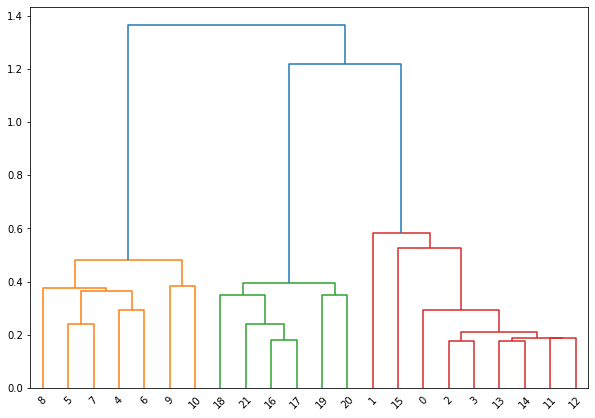

In [15]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dend = sch.dendrogram(sch.linkage(x,method="single"))

In [16]:
len(data)

22

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='single')
ypred = cluster.fit_predict(x)
ypred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
x['cluster'] = ypred
x

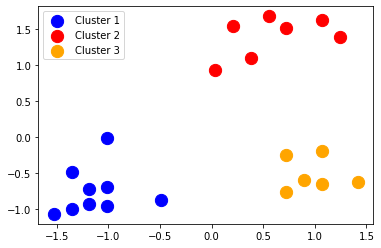

In [20]:
x1 = x[x['cluster']==0]
x2 = x[x['cluster']==1]
x3 = x[x['cluster']==2]
plt.scatter(x1['Age'],x1['Income($)'],color='blue',s=150,label="Cluster 1")
plt.scatter(x2['Age'],x2['Income($)'],color='red',s=150,label="Cluster 2")
plt.scatter(x3['Age'],x3['Income($)'],color='orange',s=150,label="Cluster 3")
plt.legend()
plt.show()